# Import Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('AdmissionPredict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


# Data Exploratory Analysis

## Dealing With Missing Data
Let's see which column has NaN values : 

In [ ]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

Let's drop NaN values in Chance of Admit column:

In [ ]:
df = df[df['Chance of Admit'].notna()]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...,...
394,395,329.0,111.0,4,4.5,4.0,9.23,1,0.89
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67


### GRE Score

In [ ]:
df.corr()['GRE Score'].drop('GRE Score').sort_values(ascending = False)

TOEFL Score          0.840993
CGPA                 0.830727
Chance of Admit      0.805076
University Rating    0.671549
SOP                  0.620963
Research             0.588385
LOR                  0.556729
Serial No.          -0.105022
Name: GRE Score, dtype: float64

We will group the dataframe by University Rating(Because there's a high correlation between ) and calculate the average value for GRE Score per University Rating

In [ ]:
Per_UR = df.groupby('University Rating').mean()['GRE Score']
Per_UR

University Rating
1    303.520000
2    309.410526
3    315.790323
4    324.671875
5    328.642857
Name: GRE Score, dtype: float64

In [ ]:
def fill_nan(uni_rating, second) :
  if np.isnan(second) : 
    return Per_UR[uni_rating]
  else :
    return second

df['GRE Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['GRE Score']),axis = 1)

In [ ]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          19
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### TOEFL Score Column

In [ ]:
df.corr()['TOEFL Score'].drop('TOEFL Score').sort_values(ascending = False)

GRE Score            0.834685
CGPA                 0.828364
Chance of Admit      0.783667
University Rating    0.689511
SOP                  0.647810
LOR                  0.556272
Research             0.509609
Serial No.          -0.153994
Name: TOEFL Score, dtype: float64

In [ ]:
Per_UR = df.groupby('University Rating').mean()['TOEFL Score']
Per_UR

University Rating
1     99.240000
2    103.729167
3    107.000000
4    111.530303
5    113.800000
Name: TOEFL Score, dtype: float64

In [ ]:
df['TOEFL Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['TOEFL Score']),axis = 1)

In [ ]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### CGPA Column

In [ ]:
df.corr()['CGPA'].drop('CGPA').sort_values(ascending = False)

Chance of Admit      0.872492
GRE Score            0.824538
TOEFL Score          0.824481
University Rating    0.750312
SOP                  0.720422
LOR                  0.669002
Research             0.527005
Serial No.          -0.058785
Name: CGPA, dtype: float64

In [ ]:
Per_UR = df.groupby('University Rating').mean()['CGPA']
Per_UR

University Rating
1    7.750000
2    8.196064
3    8.550000
4    9.020746
5    9.316909
Name: CGPA, dtype: float64

In [ ]:
df['CGPA'] = df.apply(lambda row : fill_nan(row['University Rating'],row['CGPA']),axis = 1)

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Scatterplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

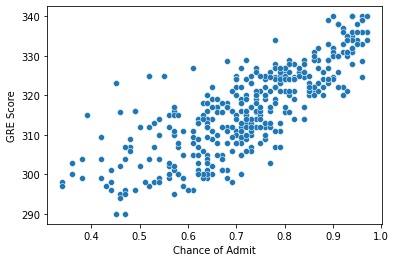

In [ ]:
sns.scatterplot(data = df, x = 'Chance of Admit', y  = 'GRE Score')

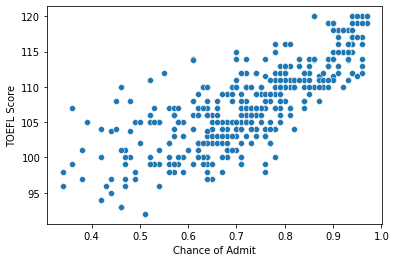

In [ ]:
sns.scatterplot(data = df, x = 'Chance of Admit', y  = 'TOEFL Score')

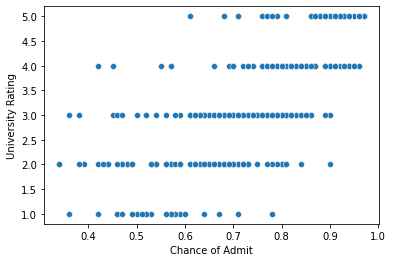

In [ ]:
sns.scatterplot(data = df, x = 'Chance of Admit', y  = 'University Rating')

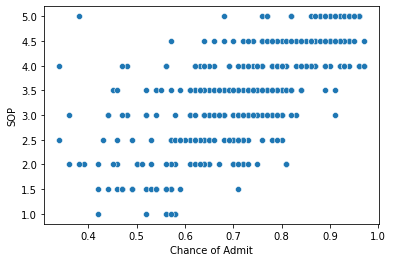

In [ ]:
sns.scatterplot(data = df, x = 'Chance of Admit', y  = 'SOP')

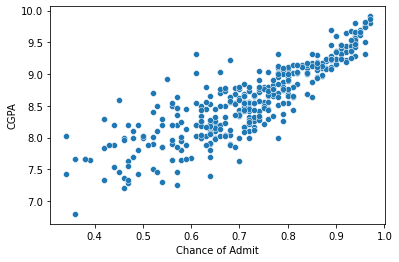

In [ ]:
sns.scatterplot(data = df, x = 'Chance of Admit', y  = 'CGPA')

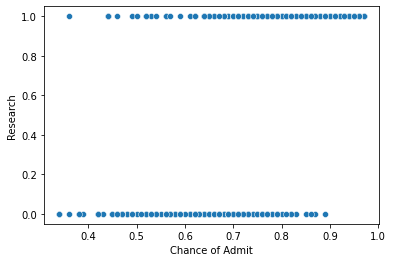

In [ ]:
sns.scatterplot(data = df, x = 'Chance of Admit', y  = 'Research')

It seems **CGPA** correlates more with Chance of Admission 

# Training the model

## Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Serial No.','Chance of Admit'],axis = 1)
y = df['Chance of Admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.42      , 0.22222222, 0.25      , ..., 0.5       , 0.28782288,
        0.        ],
       [0.58      , 0.55555556, 0.5       , ..., 0.625     , 0.49815498,
        1.        ],
       [0.32      , 0.62962963, 0.25      , ..., 0.75      , 0.46125461,
        0.        ],
       ...,
       [0.28      , 0.33333333, 0.25      , ..., 0.75      , 0.56457565,
        0.        ],
       [0.88      , 0.85185185, 0.75      , ..., 0.625     , 0.86346863,
        1.        ],
       [0.72      , 0.7037037 , 0.5       , ..., 0.5       , 0.68265683,
        1.        ]])